# Synthesis of all algorithms


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

## a synthesis



In [3]:
%%writefile data_cache/synthesis.py

try:
    import sys
    command = sys.argv[1]
except:
    command = 'run'

metatag = 'synthesis_'
from shl_scripts.shl_experiments import SHL_set
verbose = 0
#default = dict(eta=.02, beta1=.9, beta2=.999, epsilon=1.e-8, n_iter=2**15+1,
#               nb_quant=128, n_dictionary=23**2, patch_width=16, verbose=verbose)
default = dict(verbose=verbose)

# opts = {}
# opts['nohomeo'] = dict(homeo_method='None')
# opts['EMP'] = dict(homeo_method='EMP', eta_homeo=0.01, alpha_homeo=0.1)
# opts['EXP'] = dict(homeo_method='EXP', eta_homeo=0.01, alpha_homeo=0.1)
# opts['HAP'] = dict(homeo_method='HAP', eta_homeo=0.01, alpha_homeo=0.1)
# opts['HEH'] = dict(homeo_method='HEH', eta_homeo=0.01, C=4., nb_quant=128, P_cum=None)


homeo_methods = ['None', 'HAP']
homeo_methods = ['None', 'EMP', 'EXP', 'HAP']
homeo_methods = ['None', 'EMP', 'EXP', 'HAP', 'HEH']


variables = ['alpha_homeo']
variables = ['eta', 'alpha_homeo']
variables = ['eta', 'alpha_homeo', 'eta_homeo', 'l0_sparseness']
variables = ['eta', 'alpha_homeo', 'eta_homeo']
variables = ['eta', 'alpha_homeo', 'eta_homeo', 'l0_sparseness', 'n_dictionary']

display_variables = ['error', 'logL', 'cputime']
display_variables = ['error', 'logL', 'perror', 'perror']

n_jobs = 6
n_jobs = 4
n_jobs = 1


if command == 'run':
    for tag in homeo_methods:
        default.update(homeo_method=tag)
        experiments = SHL_set(default, tag=metatag + tag)
        experiments.run(variables=variables, n_jobs=n_jobs)
    
if command == 'plot':
    import matplotlib.pyplot as plt

    for variable in variables:
        list_figures = ['show_dico', 'time_plot_MC']
        list_figures = []


        for tag in homeo_methods:
            default.update(homeo_method=tag)
            experiments = SHL_set(default, tag=metatag + tag)
            experiments.scan(variable=variable, list_figures=list_figures, display='')
        
        for display_variable in display_variables:

            fig, ax = None, None
            for tag in homeo_methods:
                default.update(homeo_method=tag)
                experiments = SHL_set(default, tag=metatag + tag)
                fig, ax = experiments.scan(variable=variable, list_figures=[], display='dynamic', fig=fig, ax=ax, label=tag, display_variable=display_variable)
            ax.legend()
            plt.show()            
        
            fig, ax = None, None
            for tag in homeo_methods:
                default.update(homeo_method=tag)
                experiments = SHL_set(default, tag=metatag + tag)
                fig, ax = experiments.scan(variable=variable, list_figures=[], display='final', fig=fig, ax=ax, label=tag, display_variable=display_variable)

            ax.legend()
            plt.show()            

Overwriting data_cache/synthesis.py


In [4]:
%run data_cache/synthesis.py load

## CPU time as a function of the number of dictionary elements



In [5]:
%run data_cache/synthesis.py run

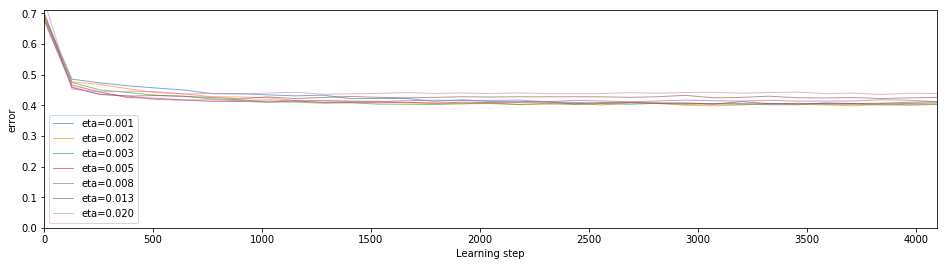

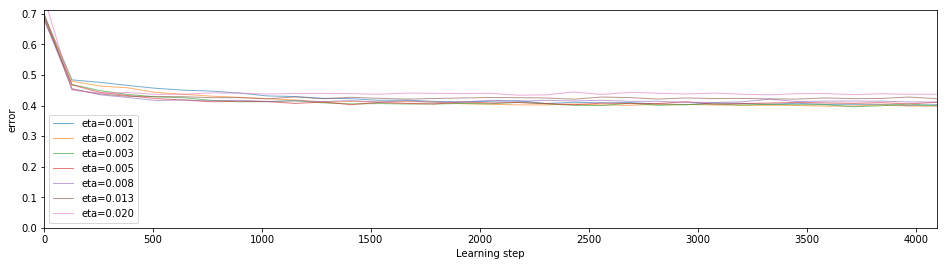

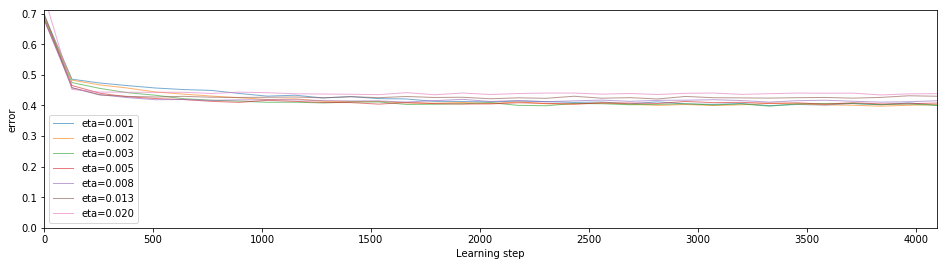

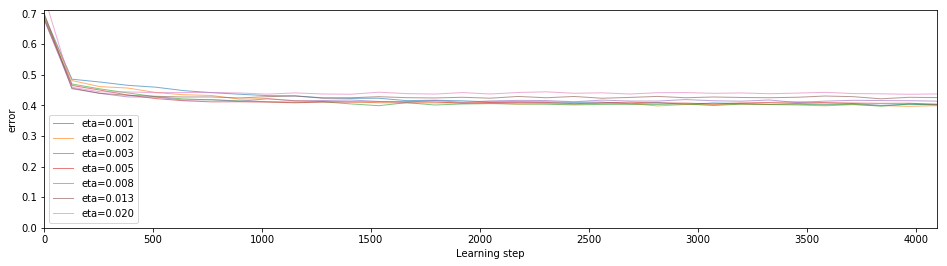

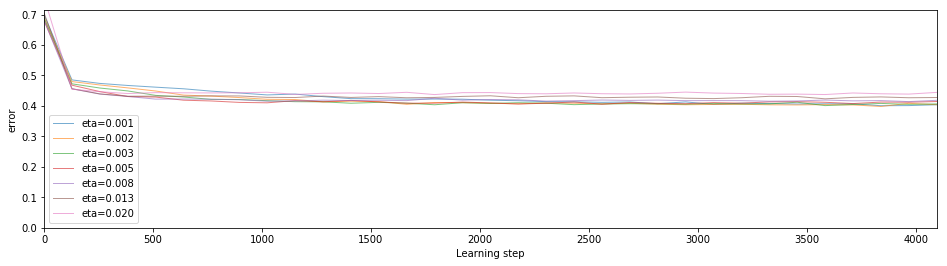

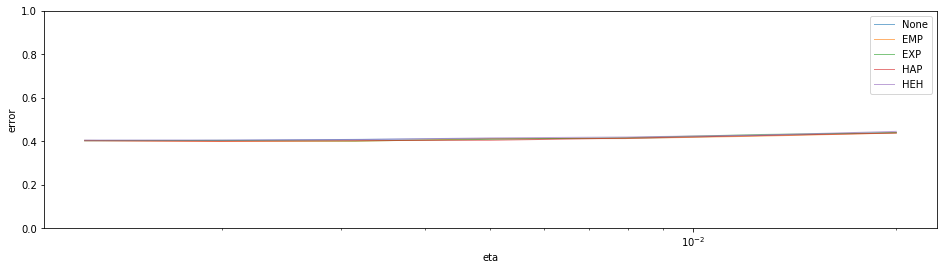

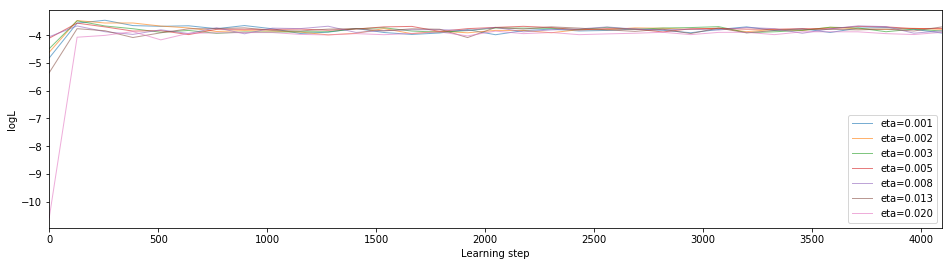

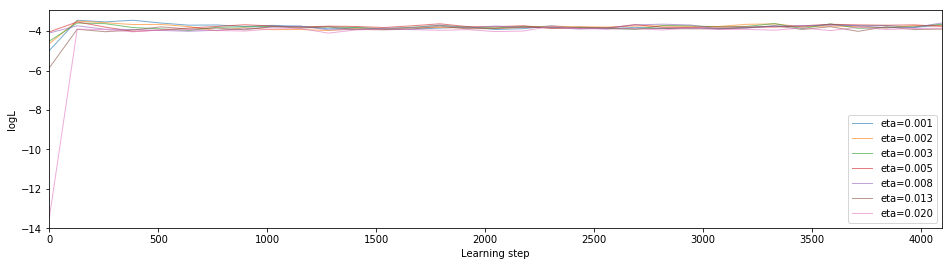

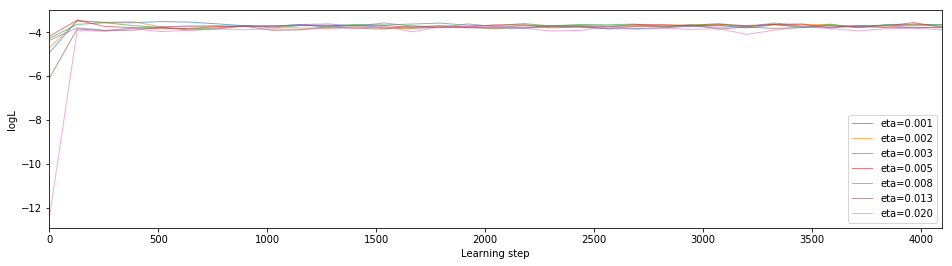

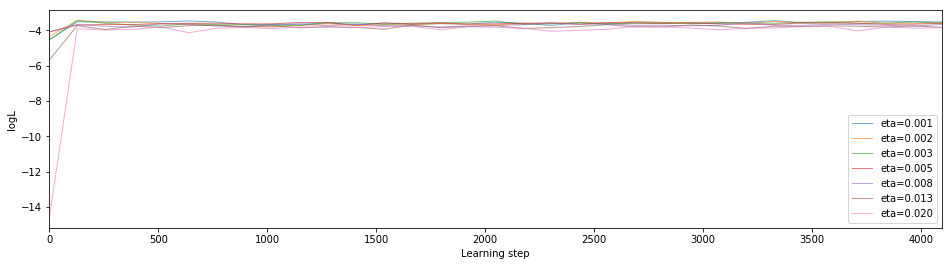

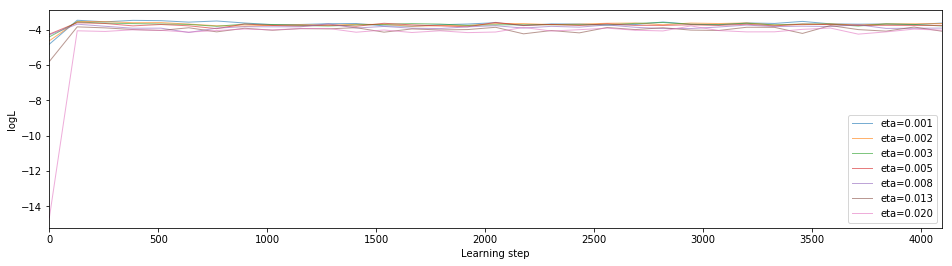

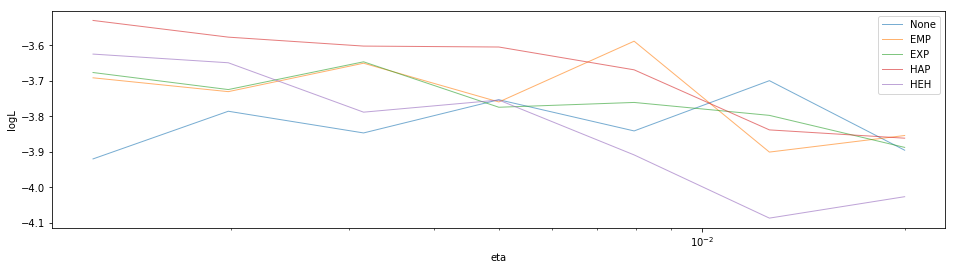

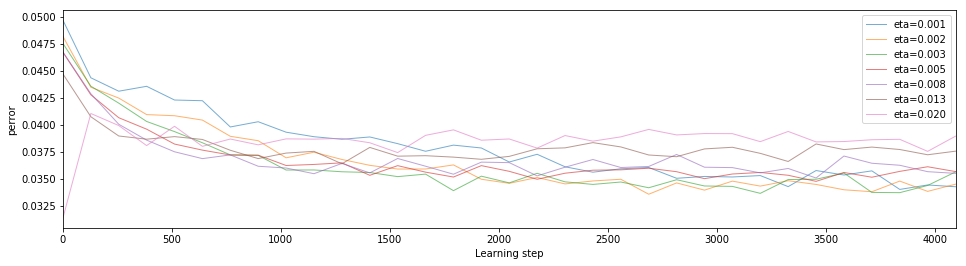

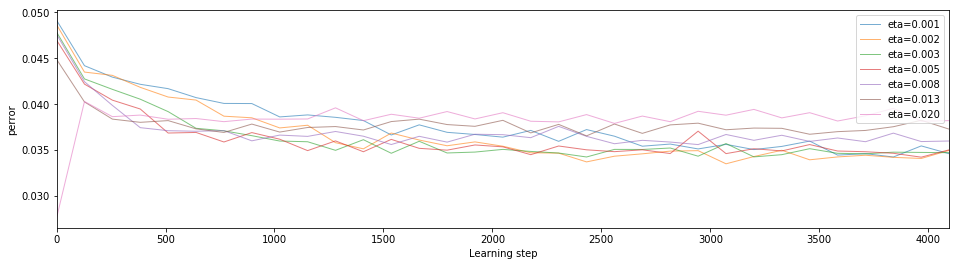

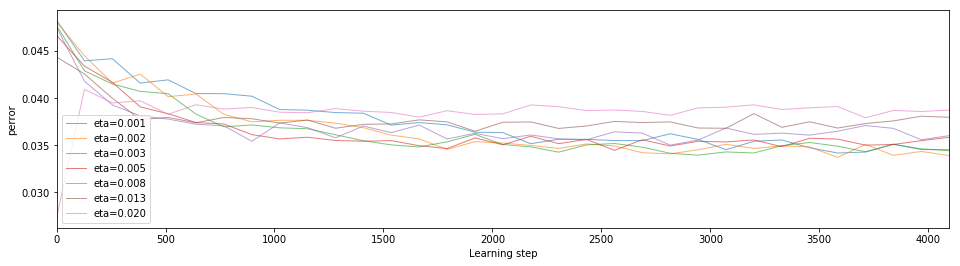

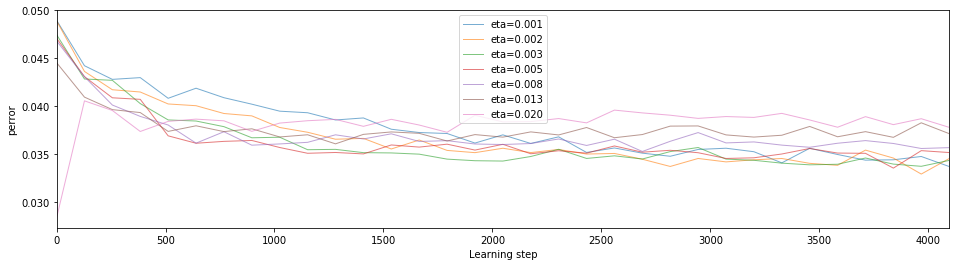

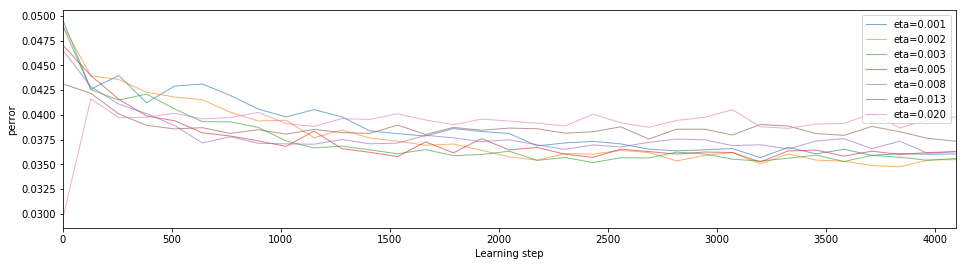

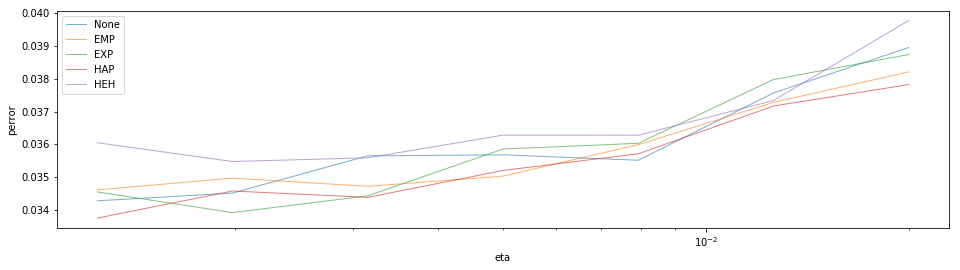

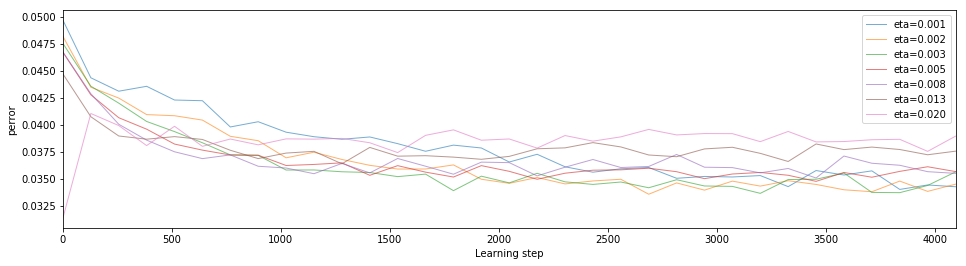

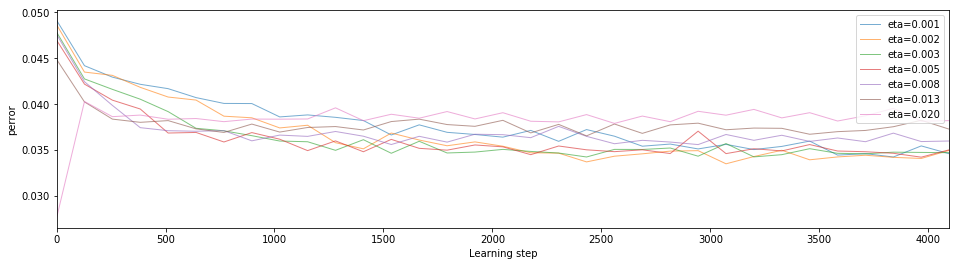

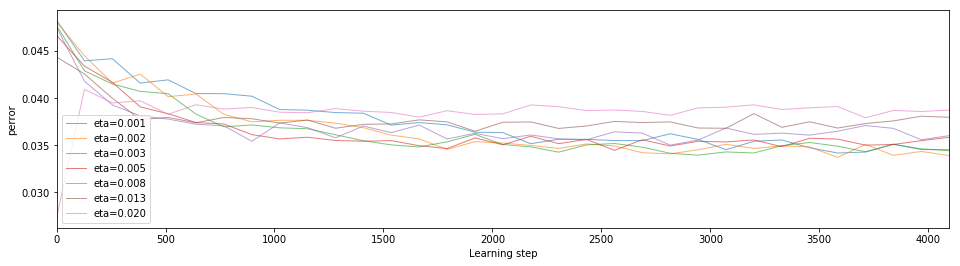

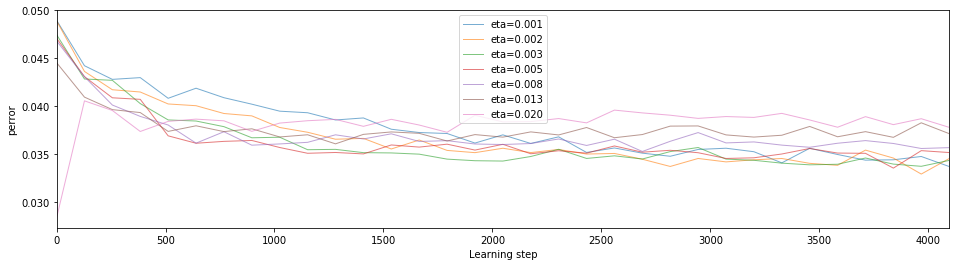

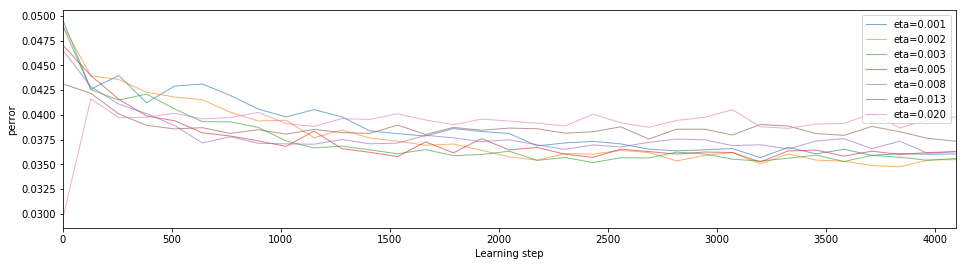

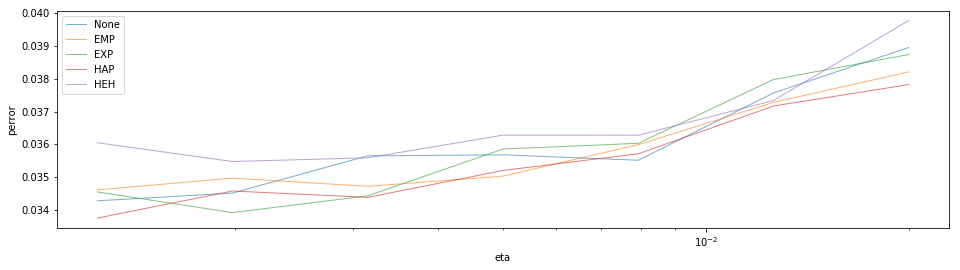

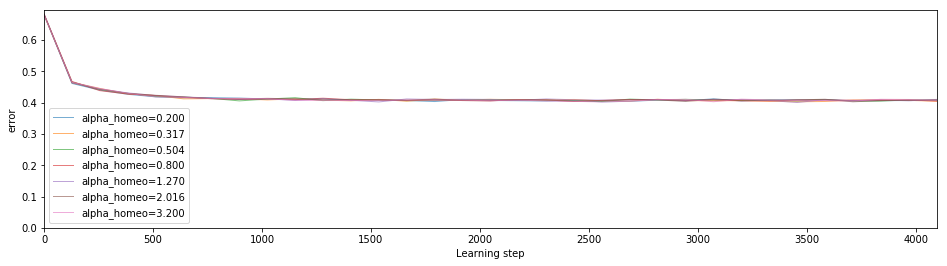

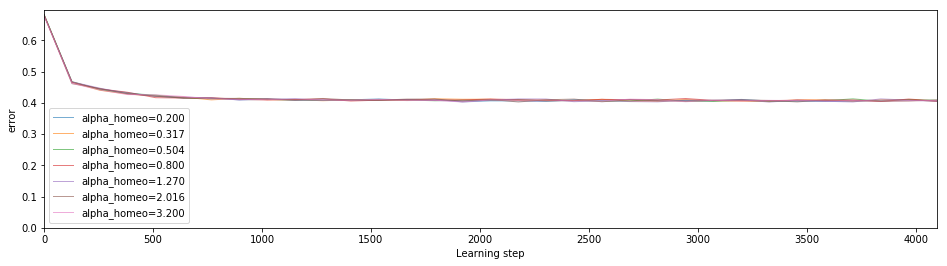

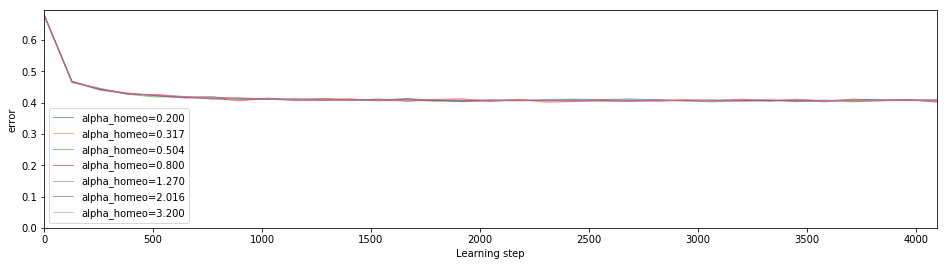

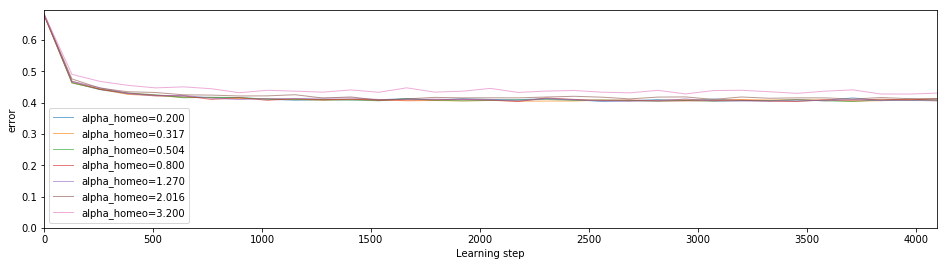

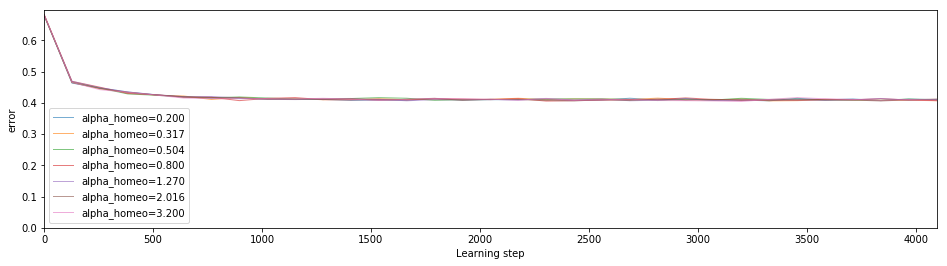

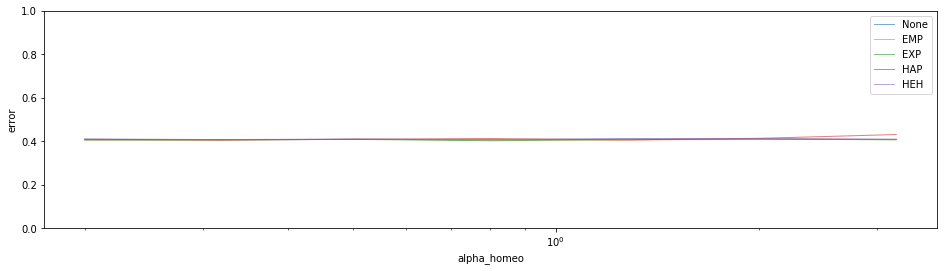

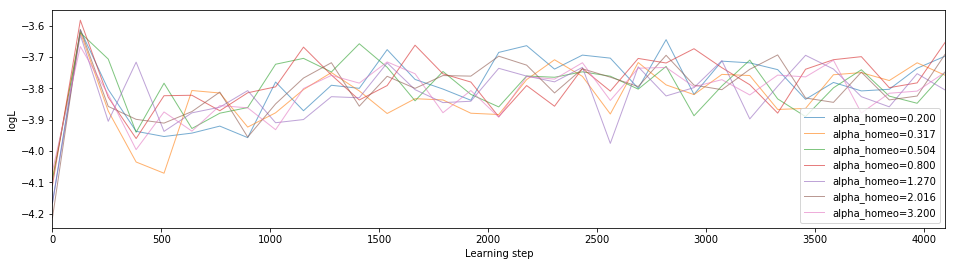

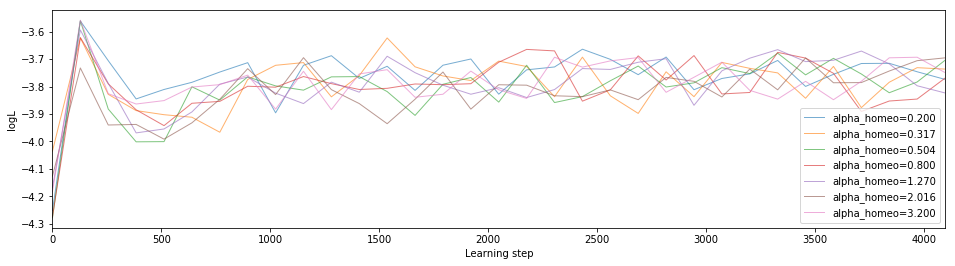

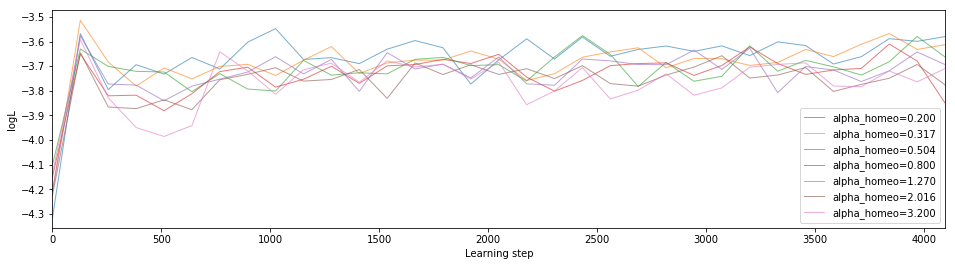

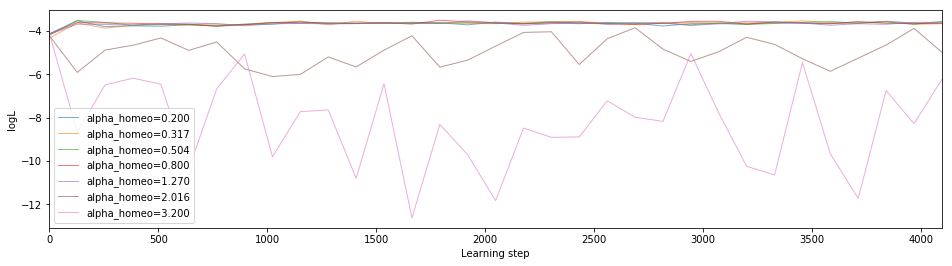

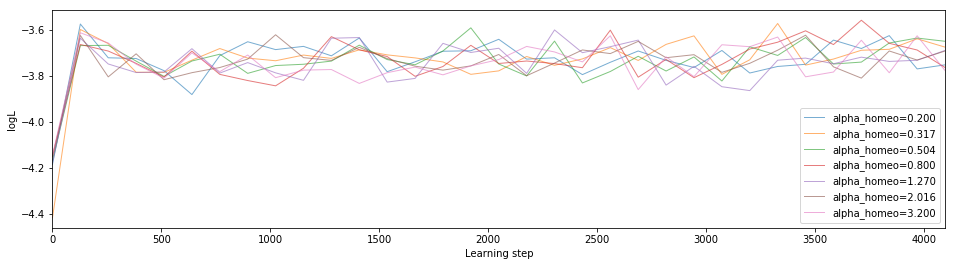

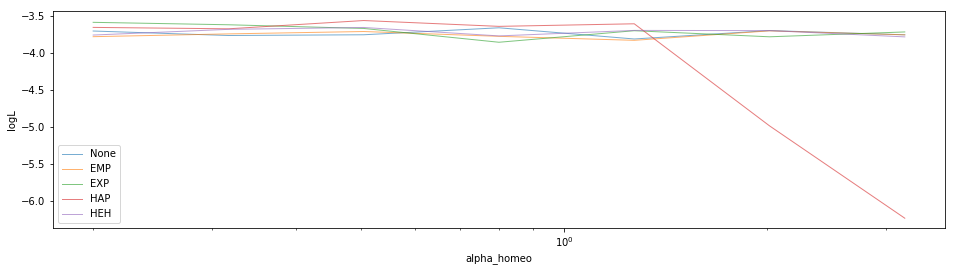

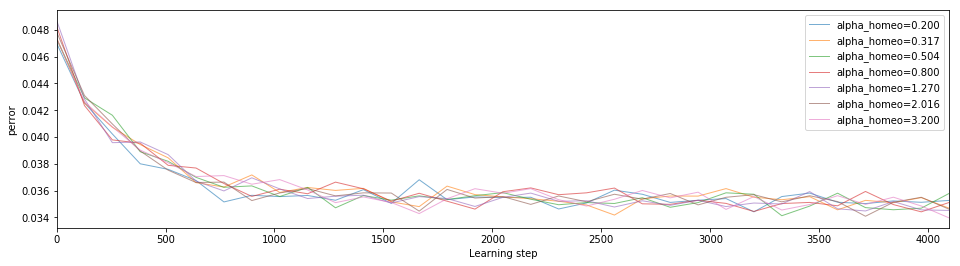

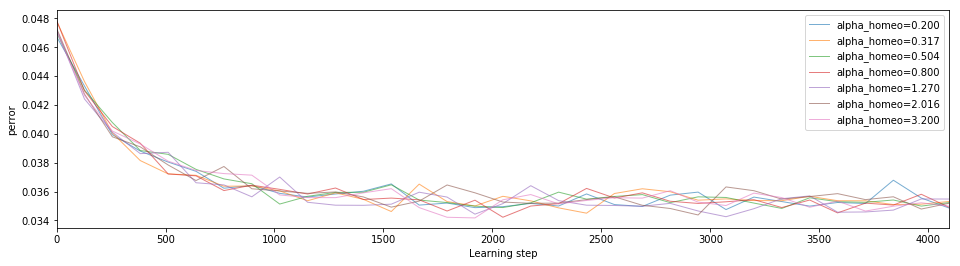

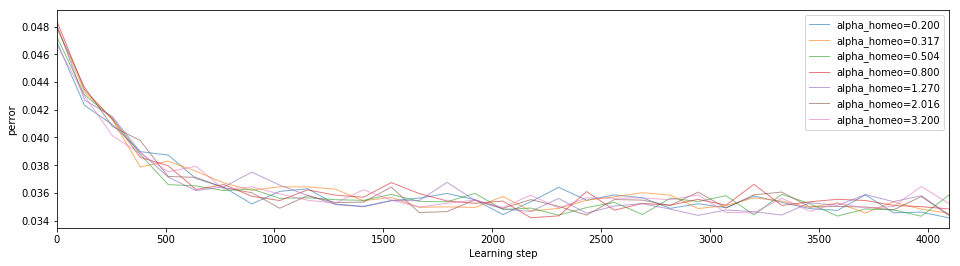

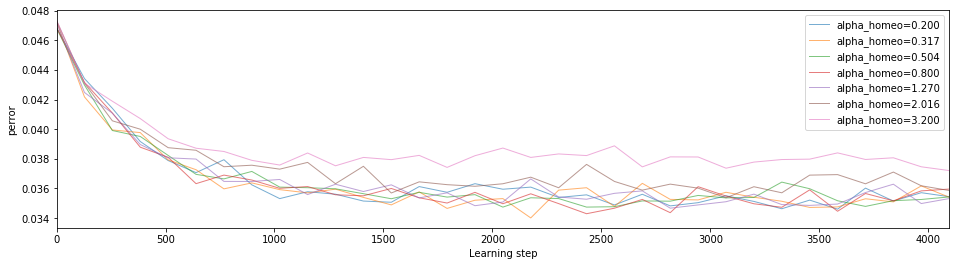

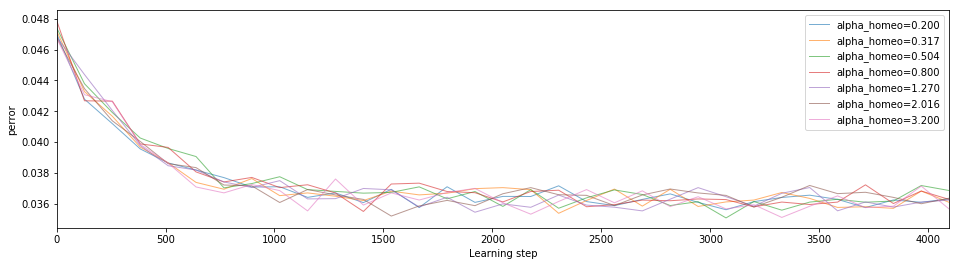

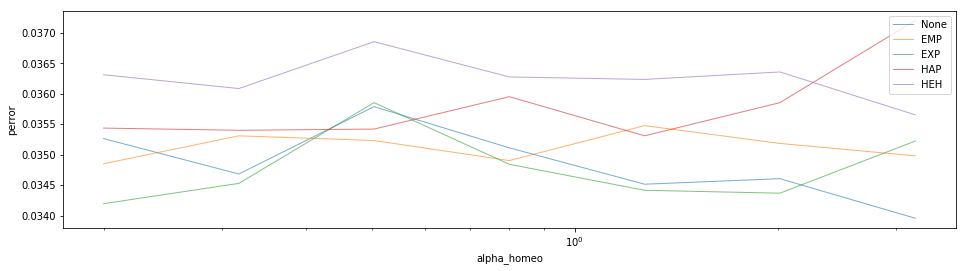

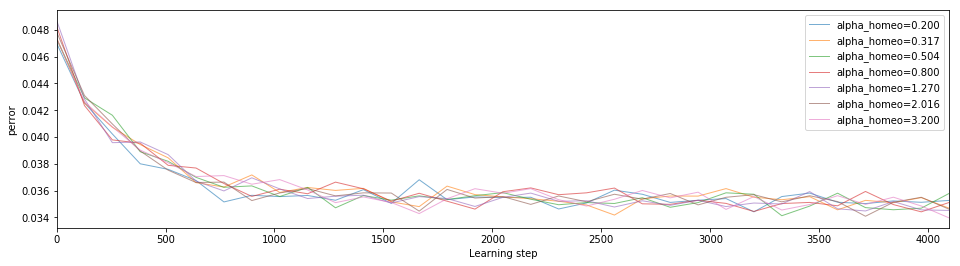

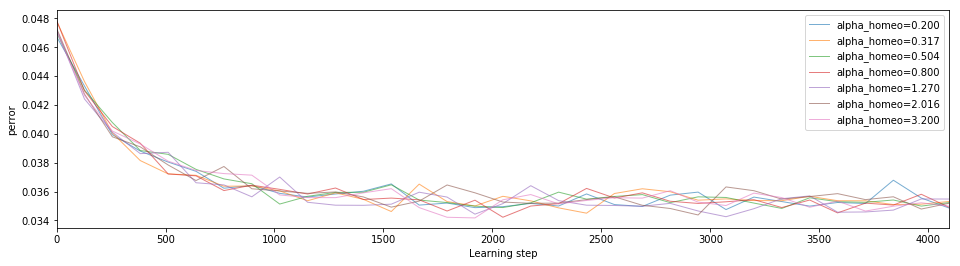

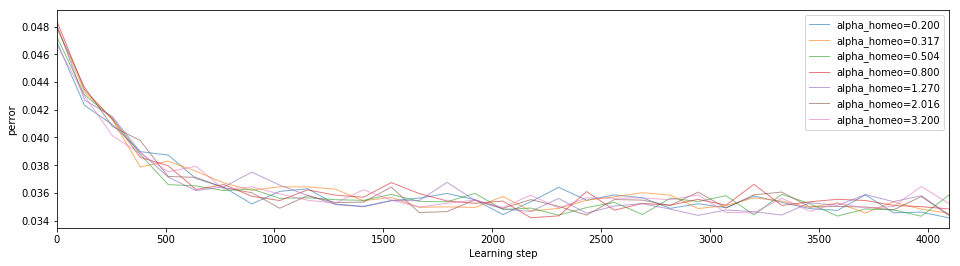

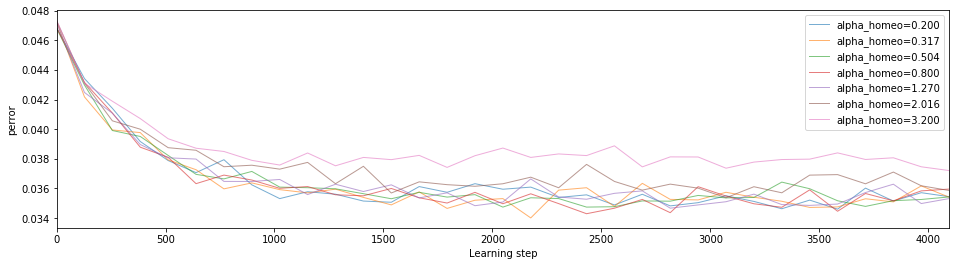

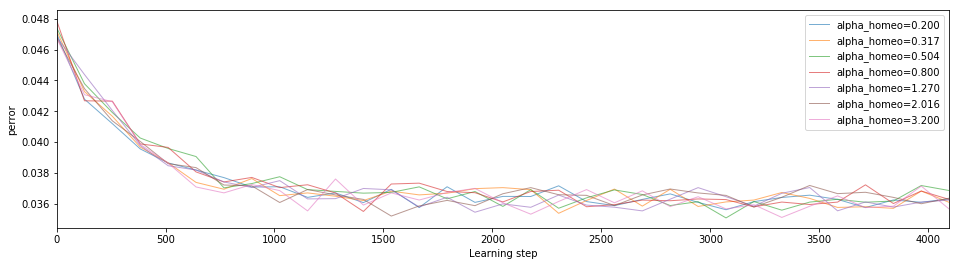

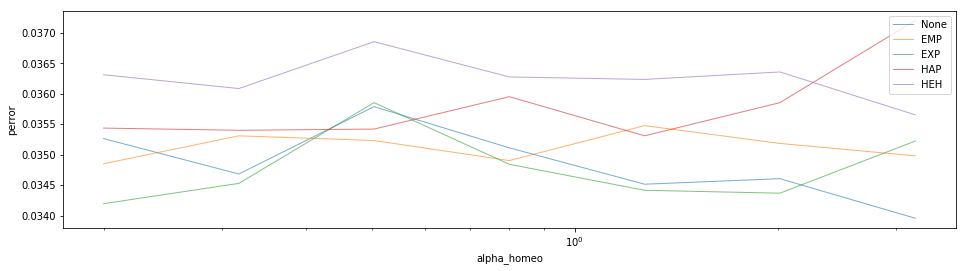

AttributeError: 'str' object has no attribute 'record'

In [6]:
%run data_cache/synthesis.py plot


tester:
- l0 sparseness avec MP et OMP

## Version used

In [7]:
# %load_ext version_information
%version_information numpy, shl_scripts, pandas

UsageError: Line magic function `%version_information` not found.
